# Q3

Having been given a list of treatment/trial stores and control stores, we've collected data from the pre-test period, the implementation period and the test period.

---------

- Pre-Test Period: (X weeks prior to the start of the implementation)
- 07/17/2016 - 10/15/2016
-----------
- Implemention Period: (The period of time needed to actually get get the experiment ready; in this
case, the time to put the signs up across all stores)
- 10/16/2016 - 11/12/2016
-----------
- Test Period: (X weeks after the end of the implementation period)
- 11/13/2016 - 02/12/2017
-----------

This question aims to solve, using the given data, how to quantify the impact of this test on the revenue from Brand Z's candy sales. 

The business question surrounds whether Client X should roll out the trialed signs to all their stores.

----
## Notes
Let's note that the treatment/trial stores contain the stores which implemented the change/strategy of changing the signs for Brand Z candy during the noted trial period.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import trial and control store file
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\trial_control_stores.csv'
trial_and_control = pd.read_csv(file)

# isolate first two columns
trial_and_control = trial_and_control.iloc[:, :2]
trial_and_control

,Trial Stores,Control Stores
0,457,384
1,366,511
2,431,539
3,438,667
4,344,643
5,654,614
6,492,343
7,399,556
8,545,382
9,424,371


In [5]:
# Import transactions dataframe
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\Given Files\transactions.csv'
transactions = pd.read_csv(file, index_col = 0)
transactions.head()

,date_week,store_id,product_id,currency_code,revenue
0,2016-07-10 00:00:00.000000,526,31107,USD,3.32
1,2016-07-10 00:00:00.000000,526,30772,USD,1.99
2,2016-07-10 00:00:00.000000,526,30887,USD,5.32
3,2016-07-10 00:00:00.000000,526,31133,USD,6.98
4,2016-07-10 00:00:00.000000,526,31118,USD,1.99


In [9]:
# Import products of interest dataframe
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\Given Files\products_of_interest.csv'
products = pd.read_csv(file, header = None)

# Rename column to IDs
products.rename(columns = {0:'IDs'}, inplace = True)
products.head()

,IDs
0,30898
1,30710
2,30844
3,30900
4,30981


We want to ensure that the transactions we're looking at only revolve around the products of interest. Again, this parameter may be changed should the experiment be repeated to encapsulate all transactions.

In [10]:
# Make df of transactions revolving around products of interest
relevant_df = transactions[transactions['product_id'].isin(products['IDs'])]
relevant_df

,date_week,store_id,product_id,currency_code,revenue
0,2016-07-10 00:00:00.000000,526,31107,USD,3.32
1,2016-07-10 00:00:00.000000,526,30772,USD,1.99
2,2016-07-10 00:00:00.000000,526,30887,USD,5.32
3,2016-07-10 00:00:00.000000,526,31133,USD,6.98
4,2016-07-10 00:00:00.000000,526,31118,USD,1.99
...,...,...,...,...,...
1224299,2017-02-12 00:00:00.000000,610,30720,USD,2.78
1224300,2017-02-12 00:00:00.000000,610,30940,USD,7.96
1224302,2017-02-12 00:00:00.000000,610,30749,USD,2.78
1224303,2017-02-12 00:00:00.000000,610,30805,USD,1.99


In [11]:
# Make the date_week column a datetime datatype
relevant_df['date_week'] = pd.to_datetime(relevant_df['date_week'])
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118551 entries, 0 to 1224304
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   date_week      1118551 non-null  datetime64[ns]
 1   store_id       1118551 non-null  int64         
 2   product_id     1118551 non-null  int64         
 3   currency_code  1118551 non-null  object        
 4   revenue        1118551 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 51.2+ MB


C:\Users\Joel\AppData\Local\Temp\ipykernel_16556\622920392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['date_week'] = pd.to_datetime(relevant_df['date_week'])


# Isolating Trial Period data only

- The trial period runs from 11/13/2016 - 02/12/2017 (USA date notation).

In [12]:
# Isolate trial_period data

# Create mask
mask = (relevant_df['date_week'] > '2016-11-12') & (relevant_df['date_week'] < '2017-02-13')

# Transform df
trial_data = relevant_df.loc[mask]

# Show df
trial_data

,date_week,store_id,product_id,currency_code,revenue
689213,2016-11-13,526,30936,USD,4.99
689214,2016-11-13,526,30874,USD,7.64
689215,2016-11-13,526,30690,USD,32.94
689216,2016-11-13,526,31174,USD,34.27
689217,2016-11-13,526,31107,USD,11.97
...,...,...,...,...,...
1224299,2017-02-12,610,30720,USD,2.78
1224300,2017-02-12,610,30940,USD,7.96
1224302,2017-02-12,610,30749,USD,2.78
1224303,2017-02-12,610,30805,USD,1.99


In [13]:
# Export to csv
# trial_data.to_csv('trial_data.csv')

# Isolating Groups
For the purpose of saving time, lets assume there are 3 groups.
- Group 1 (smaller stores/low-selling stores)
- Group 2 (medium stores/medium-selling stores)
- Group 3 (large stores/high-selling stores)

Having these groups will allow us to more effectively understand which type of stores to implement the changes into and which to not.

For each group, we will choose 3 trial/control pairs in a similar manner to how we separated using clusters. 

Our criteria for whether a group should implement the changes or not, is if we see any 'significant uplift' in 2/3 of the stores in that group.

For example, in smaller stores, if the two trial stores show significant uplift (outside the 5th% and 95th% confidence interval) then we can say that the changes should be implemented in smaller stores.

If only 1/3 stores show uplift, we can say that changes should not be implemented in smaller stores.

----

These stores will be chosen arbitrarily under the highlighted assumption.

### The following stores per group have been selected:

----
![alt text](trial_groupings.png "Trial Groupings")

# Group 1 (Small Stores)

In [3]:
# Import grouped files

# Group 1.1 (trial 457)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 1\Group1_1.csv'
group1_1 = pd.read_csv(file)

# Group 1.2 (trial 431)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 1\Group1_2.csv'
group1_2 = pd.read_csv(file)

# Group 1.3 (trial 674)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 1\Group1_3.csv'
group1_3 = pd.read_csv(file)

- Check files are properly imported

In [4]:
group1_1

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,457,858.55,774.14,841.10,790.88,899.30,712.35,653.72,811.10,799.30,726.29,920.37,919.34,826.88,93.04
1,384,644.53,628.33,635.12,596.24,655.06,471.66,446.26,613.87,659.13,740.66,726.98,859.26,650.90,93.64


In [5]:
group1_2

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,431,1166.59,1128.58,997.12,895.83,890.32,830.03,779.24,927.67,1128.91,985.94,1021.15,999.86,1138.84,127.55
1,539,847.01,703.13,726.77,757.61,858.65,763.91,523.45,644.76,757.36,757.65,790.66,992.43,754.15,93.47


In [6]:
group1_3

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,674,1104.4,1460.58,1036.16,823.63,811.75,803.10,1316.41,891.72,1140.64,923.04,927.78,989.14,856.41,120.47
1,341,1414.3,1719.16,1345.31,1400.01,1157.05,1208.78,1315.87,1255.93,1302.32,1099.96,1377.75,1265.20,1358.96,155.78


- Let's create some functions first

In [1]:
# Calculate percentage difference

def get_confidence_intervals(group_df, trial_num, control_num):
    
    # Calculate percentage diff
    percentages = group_df.T
    percentages = percentages.drop('Store ID')
    percentages.rename(columns = {0: trial_num, 1: control_num}, inplace = True)
    percentages['PercentageDiff'] = (abs(percentages[control_num] - percentages[trial_num])) / percentages[control_num]
    
    # To see if differences are significant, we can do a t-test.
    # Our null hypothesis is that the strategy had no effect on trial store performance.
    # We need to take thje standard deviation based on the scaled percentage diff in the trial
    
    # Get standard deviation
    group_stdv = percentages['PercentageDiff'].std()
    
    # Calculate the T Values for weeks in the trial
    percentages['tValue'] = (percentages['PercentageDiff'] - 0) / group_stdv
    
    # The tValue will allow us to test with a null hypothesis that there is zero difference
    # between the trial and control stores in those weeks
    
    percentages['95th%ConfInv'] = percentages[control_num] * (1+(group_stdv * 2))
    percentages['5th%ConfInv'] = percentages[control_num] * (1-(group_stdv * 2))
    
    return percentages

# Plotting
def plot_intervals(data, trial_num, control_num):
    
    # Styling
    plt.figure(figsize = (10,6))
    plt.style.use('seaborn-white')
    green_color = '#23d993'
    blue_color = '#2372d9'
    
    # Plot
    sns.lineplot(data = data, x = data.index, y = trial_num, color = blue_color)
    sns.lineplot(data = data, x = data.index, y = control_num, color = green_color)
    sns.lineplot(data = data, x = data.index, y = '95th%ConfInv', color = 'tomato',
                linestyle = '--', alpha = 0.7)
    sns.lineplot(data = data, x = data.index, y = '5th%ConfInv', color = 'salmon',
                linestyle = '--', alpha = 0.7)
    
    # Labels
    plt.title(f'Weekly Revenue during trial ({trial_num} vs {control_num})', fontsize = 18)
    plt.xlabel('Weeks during Trial', fontsize = 14)
    plt.ylabel('Revenue ($USD)', fontsize = 14)
    plt.xticks(rotation = 20)
    
    # Grid
    plt.grid(alpha = 0.6)
    
    # Legend
    plt.legend(['Trial Store', 'Control Store', '95th%ConfInv', '5th%ConfInv'])

    # Show
    plt.show()

## Group 1.1 (Trail 457 vs Control 384)

In [10]:
group1_1_df = get_confidence_intervals(group1_1, 'Trial 457', 'Control 384')
group1_1_df

,Trial 457,Control 384,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,858.55,644.53,0.332056,2.201350,838.974297,450.085703
Week 2,774.14,628.33,0.232060,1.538429,817.887019,438.772981
Week 3,841.10,635.12,0.324317,2.150043,826.725452,443.514548
Week 4,790.88,596.24,0.326446,2.164158,776.115983,416.364017
Week 5,899.30,655.06,0.372851,2.471802,852.681028,457.438972
Week 6,712.35,471.66,0.510304,3.383038,613.952208,329.367792
Week 7,653.72,446.26,0.464886,3.081941,580.889438,311.630562
Week 8,811.10,613.87,0.321290,2.129975,799.064670,428.675330
Week 9,799.30,659.13,0.212659,1.409814,857.978881,460.281119
Week 10,726.29,740.66,0.019402,0.128622,964.105166,517.214834


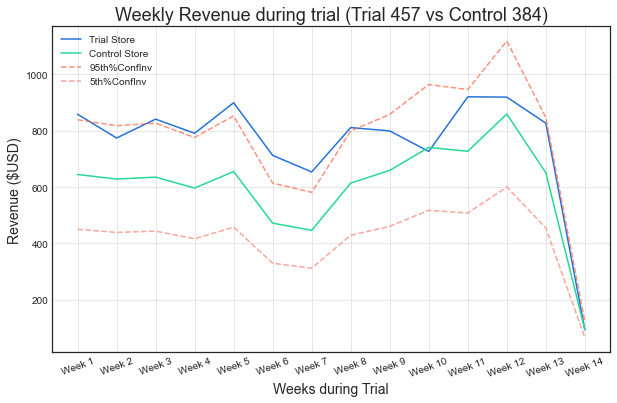

In [13]:
plot_intervals(group1_1_df, 'Trial 457', 'Control 384')

Results (Group 1.1)

    In this group, the trial showed 'significant' performance in only 6/14 weeks.
    We can conclude that it was not as effective in this trial store.



## Group 1.2 (Trial 431 vs Control 539)

In [15]:
group1_2_df = get_confidence_intervals(group1_2, 'Trial 431', 'Control 539')
group1_2_df

,Trial 431,Control 539,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,1166.59,847.01,0.377304,2.030079,1161.854903,532.165097
Week 2,1128.58,703.13,0.605080,3.255628,964.492790,441.767210
Week 3,997.12,726.77,0.371988,2.001480,996.920093,456.619907
Week 4,895.83,757.61,0.182442,0.981628,1039.223732,475.996268
Week 5,890.32,858.65,0.036883,0.198451,1177.821646,539.478354
Week 6,830.03,763.91,0.086555,0.465707,1047.865526,479.954474
Week 7,779.24,523.45,0.488662,2.629240,718.023340,328.876660
Week 8,927.67,644.76,0.438783,2.360870,884.425883,405.094117
Week 9,1128.91,757.36,0.490586,2.639592,1038.880803,475.839197
Week 10,985.94,757.65,0.301313,1.621213,1039.278600,476.021400


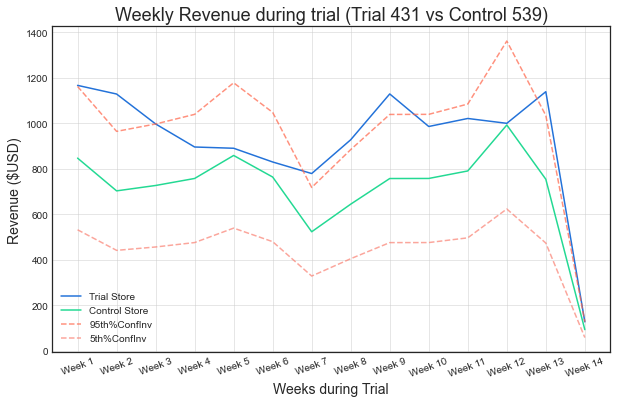

In [16]:
plot_intervals(group1_2_df, 'Trial 431', 'Control 539')

Results (Group 1.2)

    In this group, the trial showed 'significant' performance in only 6/14 weeks.
    We can conclude that it was not as effective in this trial store.



## Group 1.3 (Trial 674 vs Control 341)

In [17]:
group1_3_df = get_confidence_intervals(group1_3, 'Trial 674', 'Control 341')
group1_3_df

,Trial 674,Control 341,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,1104.40,1414.30,0.219119,2.005464,1723.355686,1105.244314
Week 2,1460.58,1719.16,0.150411,1.376618,2094.834307,1343.485693
Week 3,1036.16,1345.31,0.229798,2.103205,1639.289852,1051.330148
Week 4,823.63,1400.01,0.411697,3.768014,1705.943006,1094.076994
Week 5,811.75,1157.05,0.298431,2.731362,1409.890897,904.209103
Week 6,803.10,1208.78,0.335611,3.071646,1472.925041,944.634959
Week 7,1316.41,1315.87,0.000410,0.003756,1603.416564,1028.323436
Week 8,891.72,1255.93,0.289992,2.654124,1530.378354,981.481646
Week 9,1140.64,1302.32,0.124148,1.136249,1586.905590,1017.734410
Week 10,923.04,1099.96,0.160842,1.472092,1340.325475,859.594525


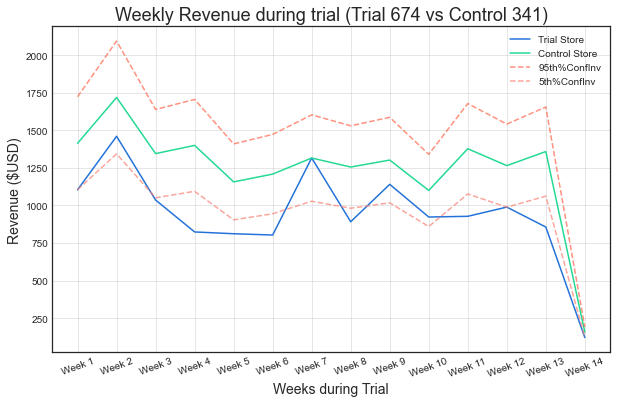

In [18]:
plot_intervals(group1_3_df, 'Trial 674', 'Control 341')

Results (Group 1.3)

    In this group, the trial showed 'significant' performance in only 6/14 weeks.
    Furthermore, the trial store performance was significantly below the performance of the control store.
    We can conclude that it was not as effective in this trial store.


## Group 1 Conclusion

- Group 1 (small stores) did not show any sustained significant uplift in any of the 3 trial stores compared to their respective control stores.
- Therefore, we do not recommend spending $X on implementing the new strategy in smaller stores. 

# Group 2 (Medium Stores)

In [3]:
# import files for medium stores

# Group 2.1 (trial 654)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 2\Group2_1.csv'
group2_1 = pd.read_csv(file)

# Group 2.2 (trial 392)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 2\Group2_2.csv'
group2_2 = pd.read_csv(file)

# Group 2.3 (trial 438)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 2\Group2_3.csv'
group2_3 = pd.read_csv(file)

- Check files are properly imported


In [4]:
group2_1

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,654,1323.85,1394.72,1153.0,1084.16,963.11,926.00,900.06,1132.18,1312.38,1250.63,1544.90,1485.32,1169.61,133.75
1,614,1402.69,1501.84,1418.2,1259.17,1217.78,1065.71,1125.61,1187.47,1353.10,1396.33,1467.62,1703.71,1382.24,164.88


In [5]:
group2_2

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,392,1101.31,1169.55,1118.15,1185.11,1230.62,1236.79,1078.27,1125.33,1233.05,1395.50,1222.29,1402.84,1380.10,216.00
1,363,1542.57,1678.86,1500.80,1307.21,1259.66,1226.36,1119.60,1148.51,1305.72,1332.85,1336.65,1574.48,1487.99,200.42


In [6]:
group2_3

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,438,1433.99,1304.57,1162.46,1194.98,1154.83,993.27,935.87,1078.57,1259.22,1469.81,1431.58,1560.86,1374.23,119.79
1,667,1144.38,1245.17,1123.92,1088.25,1003.18,808.70,822.13,1084.86,1081.70,1159.37,1259.12,1189.16,1326.16,129.60


## Group 2.1 (Trial 654 vs Control 614)

In [7]:
group2_1_df = get_confidence_intervals(group2_1, 'Trial 654', 'Control 614')
group2_1_df

,Trial 654,Control 614,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,1323.85,1402.69,0.056206,0.906363,1576.660097,1228.719903
Week 2,1394.72,1501.84,0.071326,1.150175,1688.107279,1315.572721
Week 3,1153.00,1418.20,0.186998,3.015457,1594.093741,1242.306259
Week 4,1084.16,1259.17,0.138988,2.241277,1415.339878,1103.000122
Week 5,963.11,1217.78,0.209126,3.372299,1368.816440,1066.743560
Week 6,926.00,1065.71,0.131096,2.114003,1197.885799,933.534201
Week 7,900.06,1125.61,0.200380,3.231261,1265.214959,986.005041
Week 8,1132.18,1187.47,0.046561,0.750829,1334.747211,1040.192789
Week 9,1312.38,1353.10,0.030094,0.485283,1520.919645,1185.280355
Week 10,1250.63,1396.33,0.104345,1.682630,1569.511291,1223.148709


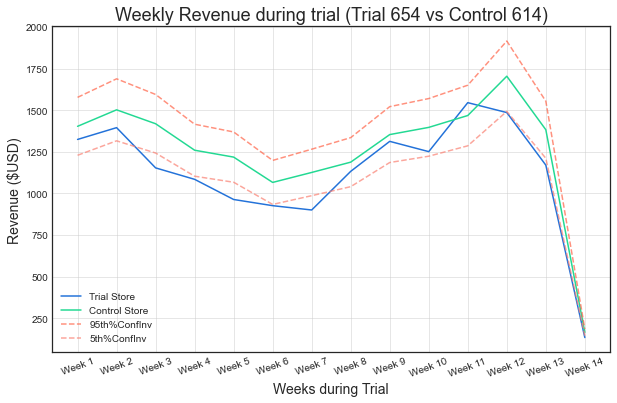

In [9]:
plot_intervals(group2_1_df, 'Trial 654', 'Control 614')

Results (Group 2.1)

    In this group, the trial showed 'significant' performance differences in only 7/14 weeks.
    Furthermore, the trial store performance was significantly below the performance of the control store.
    We can conclude that the strategy was not as effective in this trial store during the trial period.

## Group 2.2 (Trial 392 vs Control 363)

In [10]:
group2_2_df = get_confidence_intervals(group2_2, 'Trial 392', 'Control 363')
group2_2_df

,Trial 392,Control 363,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,1101.31,1542.57,0.286055,2.853968,1851.795637,1233.344363
Week 2,1169.55,1678.86,0.303367,3.026684,2015.406512,1342.313488
Week 3,1118.15,1500.80,0.254964,2.543773,1801.652367,1199.947633
Week 4,1185.11,1307.21,0.093405,0.931901,1569.255058,1045.164942
Week 5,1230.62,1259.66,0.023054,0.230008,1512.173121,1007.146879
Week 6,1236.79,1226.36,0.008505,0.084853,1472.197759,980.522241
Week 7,1078.27,1119.60,0.036915,0.368300,1344.036507,895.163493
Week 8,1125.33,1148.51,0.020183,0.201362,1378.741844,918.278156
Week 9,1233.05,1305.72,0.055655,0.555270,1567.466370,1043.973630
Week 10,1395.50,1332.85,0.047005,0.468964,1600.034886,1065.665114


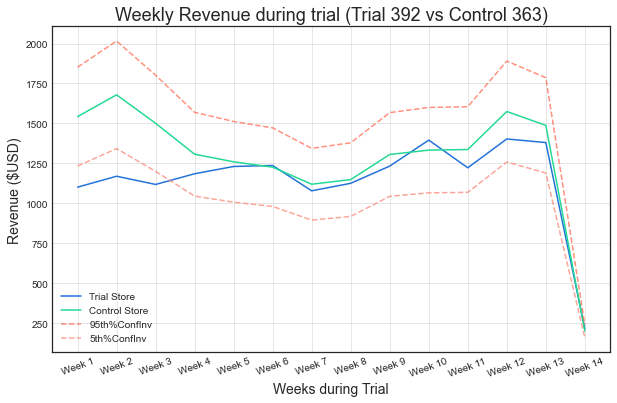

In [11]:
plot_intervals(group2_2_df, 'Trial 392', 'Control 363')

Results (Group 2.2)

    In this group, the trial showed 'significant' performance differences in only 3/14 weeks.
    Furthermore, the trial store performance was significantly below the performance of the control store.
    We can conclude that the strategy was not effective in this trial store during the trial period.

## Group 2.3 (Trial 438 vs Control 614)

In [12]:
group2_3_df = get_confidence_intervals(group2_3, 'Trial 438', 'Control 614')
group2_3_df

,Trial 438,Control 614,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,1433.99,1144.38,0.253072,2.615083,1365.872039,922.887961
Week 2,1304.57,1245.17,0.047704,0.492947,1486.169705,1004.170295
Week 3,1162.46,1123.92,0.034291,0.354339,1341.452054,906.387946
Week 4,1194.98,1088.25,0.098075,1.013444,1298.878210,877.621790
Week 5,1154.83,1003.18,0.151169,1.562089,1197.343113,809.016887
Week 6,993.27,808.70,0.228230,2.358391,965.221970,652.178030
Week 7,935.87,822.13,0.138348,1.429601,981.251315,663.008685
Week 8,1078.57,1084.86,0.005798,0.059913,1294.832084,874.887916
Week 9,1259.22,1081.70,0.164112,1.695831,1291.060473,872.339527
Week 10,1469.81,1159.37,0.267766,2.766927,1383.763318,934.976682


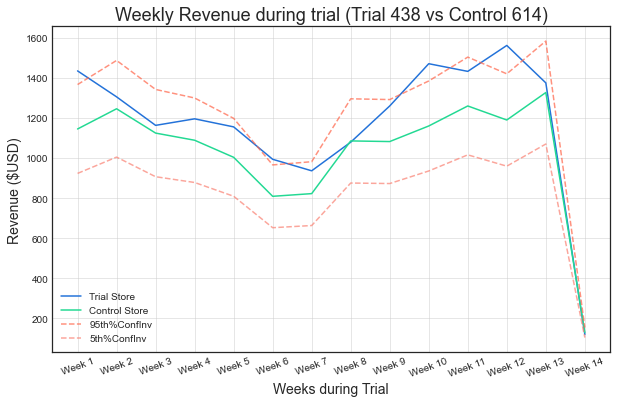

In [13]:
plot_intervals(group2_3_df, 'Trial 438', 'Control 614')

Results (Group 2.3)

    In this group, the trial showed 'significant' performance differences in only 4/14 weeks.
    We can conclude that the strategy was not effective in this trial store during the trial period.

## Group 2 Conclusion

- Group 2 (medium stores) did not show any sustained significant uplift in any of the 3 trial stores compared to their respective control stores.
- Therefore, we do not recommend spending $X on implementing the new strategy in medium-size stores. 

# Group 3 (Large Stores)

In [18]:
# import files for large stores

# Group 3.1 (trial 408)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 3\Group3_1.csv'
group3_1 = pd.read_csv(file)

# Group 3.2 (trial 545)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 3\Group3_2.csv'
group3_2 = pd.read_csv(file)

# Group 3.3 (trial 609)
file = r'C:\Users\Joel\Dropbox\PROGRAMMING\Personal Projects\AB Testing Project\My files\Q3\Group 3\Group3_3.csv'
group3_3 = pd.read_csv(file)

- Check datasets were properly imported

In [19]:
group3_1

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,408,1674.11,1415.10,1491.69,1521.01,1518.35,1220.89,1030.56,1238.50,1593.58,1724.62,1574.65,1620.07,1605.39,190.03
1,584,1152.85,1178.64,1094.95,1111.15,1083.68,921.62,728.26,932.76,976.15,944.81,1143.80,1244.30,1165.80,213.79


In [20]:
group3_2

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,545,1444.72,2062.01,1493.21,1383.94,1326.49,1377.45,1660.85,1564.41,1397.73,1301.38,1402.03,1531.29,1534.50,172.34
1,382,1504.02,1447.45,1413.10,1392.26,1331.90,1083.34,1141.68,1226.80,1509.85,1586.48,1631.18,1448.29,1544.11,172.61


In [21]:
group3_3

,Store ID,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,609,1870.55,1761.64,1762.73,1746.05,1621.11,1435.66,1258.26,1419.94,1699.77,1813.39,1759.14,1934.58,1789.58,254.47
1,521,1637.97,1822.12,1489.56,1514.67,1432.33,1369.65,990.81,1202.94,1579.82,1772.19,1804.54,1868.43,1755.36,185.43


## Group 3.1 (Trial 408 vs Control 584)

In [23]:
group3_1_df = get_confidence_intervals(group3_1, 'Trial 408', 'Control 584')
group3_1_df

,Trial 408,Control 584,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,1674.11,1152.85,0.452149,2.630761,1549.130737,756.569263
Week 2,1415.10,1178.64,0.200621,1.167284,1583.785793,773.494207
Week 3,1491.69,1094.95,0.362336,2.108199,1471.328187,718.571813
Week 4,1521.01,1111.15,0.368861,2.146163,1493.096776,729.203224
Week 5,1518.35,1083.68,0.401105,2.333772,1456.184236,711.175764
Week 6,1220.89,921.62,0.324722,1.889344,1238.417721,604.822279
Week 7,1030.56,728.26,0.415099,2.415191,978.592141,477.927859
Week 8,1238.50,932.76,0.327780,1.907138,1253.386985,612.133015
Week 9,1593.58,976.15,0.632515,3.680196,1311.691867,640.608133
Week 10,1724.62,944.81,0.825362,4.802243,1269.579053,620.040947


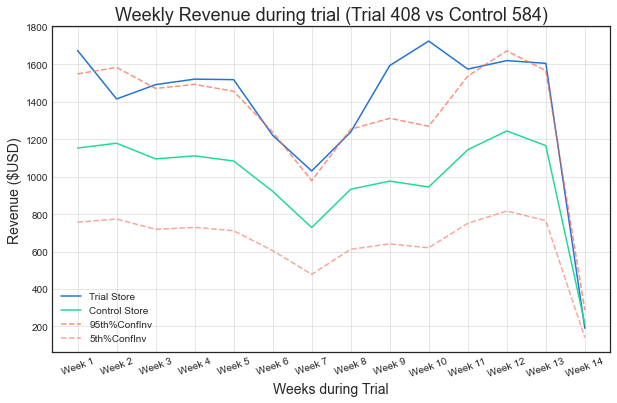

In [24]:
plot_intervals(group3_1_df, 'Trial 408', 'Control 584')

Results (Group 3.1)

    In this group, the trial showed 'significant' performance UPLIFT in 9 weeks.
    We can conclude that the strategy was indeed effective in this trial store during the trial period.

## Group 3.2 (Trial 545 vs Control 382)

In [25]:
group3_2_df = get_confidence_intervals(group3_2, 'Trial 545', 'Control 382')
group3_2_df

,Trial 545,Control 382,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,1444.72,1504.02,0.039428,0.251761,1975.101885,1032.938115
Week 2,2062.01,1447.45,0.424581,2.711115,1900.813302,994.086698
Week 3,1493.21,1413.10,0.056691,0.361994,1855.704361,970.495639
Week 4,1383.94,1392.26,0.005976,0.038158,1828.336957,956.183043
Week 5,1326.49,1331.90,0.004062,0.025937,1749.071289,914.728711
Week 6,1377.45,1083.34,0.271484,1.733533,1422.658526,744.021474
Week 7,1660.85,1141.68,0.454742,2.903704,1499.271499,784.088501
Week 8,1564.41,1226.80,0.275196,1.757231,1611.052374,842.547626
Week 9,1397.73,1509.85,0.074259,0.474173,1982.757929,1036.942071
Week 10,1301.38,1586.48,0.179706,1.147492,2083.389608,1089.570392


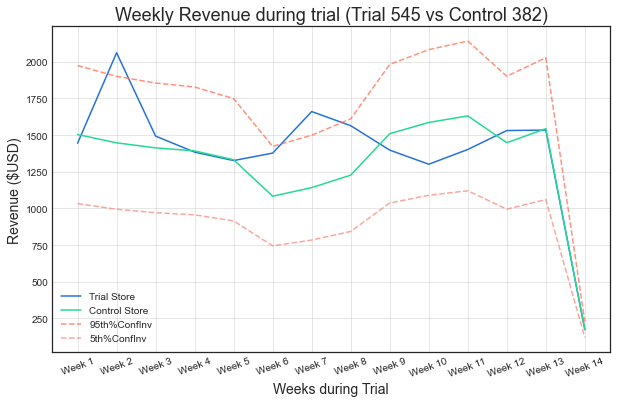

In [26]:
plot_intervals(group3_2_df, 'Trial 545', 'Control 382')

Results (Group 3.2)

    In this group, the trial showed 'significant' performance uplift in only 2 of the 13 applicable weeks.
    We can conclude that the strategy was not sustainably effective in this trial store during the trial period.

## Group 3.3 (Trial 609 vs Control 521)

In [27]:
group3_3_df = get_confidence_intervals(group3_3, 'Trial 609', 'Control 521')
group3_3_df

,Trial 609,Control 521,PercentageDiff,tValue,95th%ConfInv,5th%ConfInv
Week 1,1870.55,1637.97,0.141993,1.341047,1984.833337,1291.106663
Week 2,1761.64,1822.12,0.033192,0.313482,2207.979707,1436.260293
Week 3,1762.73,1489.56,0.183390,1.732019,1804.995419,1174.124581
Week 4,1746.05,1514.67,0.152759,1.442731,1835.422817,1193.917183
Week 5,1621.11,1432.33,0.131799,1.244774,1735.646156,1129.013844
Week 6,1435.66,1369.65,0.048195,0.455174,1659.692779,1079.607221
Week 7,1258.26,990.81,0.269931,2.549352,1200.628045,780.991955
Week 8,1419.94,1202.94,0.180391,1.703701,1457.679576,948.200424
Week 9,1699.77,1579.82,0.075926,0.717084,1914.369252,1245.270748
Week 10,1813.39,1772.19,0.023248,0.219566,2147.476323,1396.903677


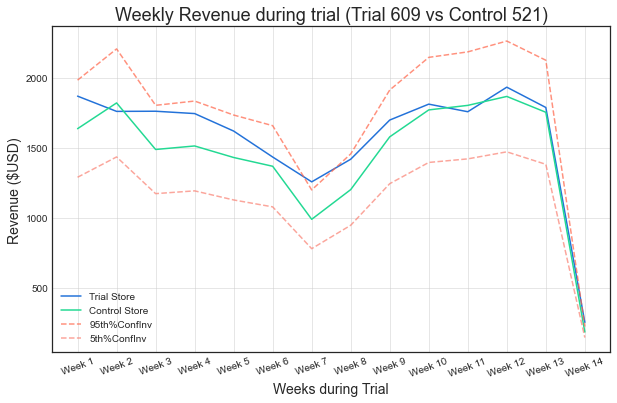

In [28]:
plot_intervals(group3_3_df, 'Trial 609', 'Control 521')

Results (Group 3.3)

    In this group, the trial showed 'significant' performance uplift in only 1 of the 13 applicable weeks.
    We can conclude that the strategy was not sustainably effective in this trial store during the trial period.

## Group 3 Conclusion

- Group 3 (large stores) only showed significant performance increase as a result of the strategy 1/3 groups.
- Therefore, we do not recommend spending $X on implementing the new strategy in large-size stores.

HOWEVER, next steps should potentially be to test in stores which are significantly similar to trial store 408 and control store 584, as the effect of the strategy showed significant uplift. 